In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split


In [4]:
# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target


In [5]:
# Select only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [6]:
# Create an instance of SVM and fit the data
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)



SVC(kernel='linear')

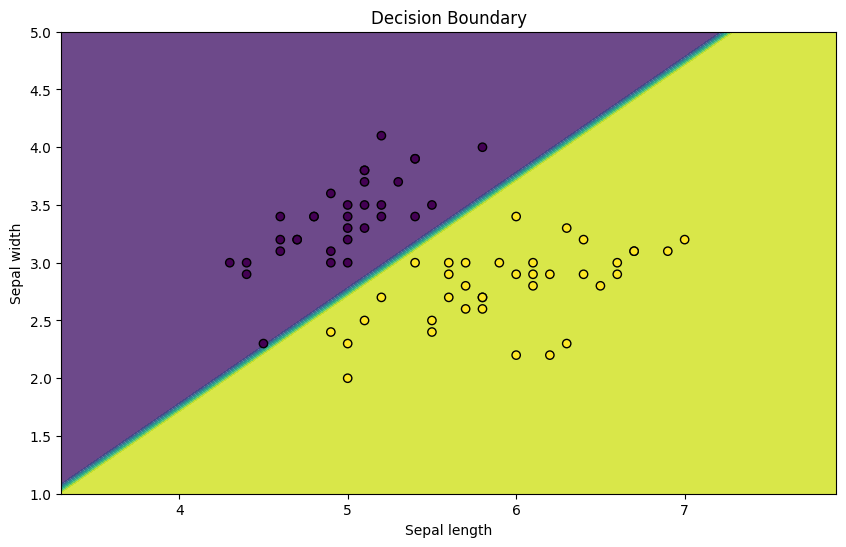

In [7]:
# Plotting decision boundary
def plot_decision_boundary(X, y, clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision Boundary')

# Plotting decision boundary and training points
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train, y_train, svm_classifier)
plt.show()



In [8]:
# Predict on the testing set
predictions = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0
